<center><h1><strong><font color="blue">Case Study : Metric & High-Performance Data Science</font></strong></h1></center>
<img alt="" src="GitHub/eLearning/images/covers/cover_ui-n-taudata.jpg"/>

<center><h1><strong><font color="blue">Kelompok "C"</font></strong></h1></center>

## Anggota Kelompok:
- Achmad Rizki Baehaki 2106725066
- Dinda Nur Ramadhan 2206816992
- Gregorius Nicholas Manik 2206051443
- Naufal Elban Musyaffa Laodebara 2206053865
- Shafa Arrantisi Setiawan 2206831965
- Yohanes Nathael 22066051405

Kontribusi :
- Achmad Rizki Baehaki : Berkontribusi dalam pengerjaan masalah pada soal nomor 1 yaitu untuk model Manhattan
- Dinda Nur Ramadhan : Berkontribusi dalam pengerjaan masalah pada soal nomor 1 yaitu untuk model Chebysev
- Gregorius Nicholas Manik : Berkontribusi dalam pengerjaan masalah pada soal nomor 1 yaitu untuk model Manhattan
- Naufal Elban Musyaffa Laodebara : Berkontribusi dalam pengerjaan masalah pada soal nomor 1 yaitu untuk model Canberra
- Shafa Arrantisi Setiawan : Berkontribusi dalam pengerjaan masalah pada soal nomor 1 yaitu untuk model Canberra
- Yohanes Nathael : erkontribusi dalam pengerjaan masalah pada soal nomor 2

<center><h1><strong><font color="blue">Kasus</font></strong></h1></center>

Diberikan program serial k-NN untuk memprediksi (test) data menggunakan jarak Euclidean seperti dibawah ini.
Tugas anda adalah:

1. Bandingkan performa model dengan 3 rumus jarak lainnya: [Manhattan, Chebysev, dan Canberra]
2. Menggunakan Thread Programming dan-atau Pemrograman Parallel (10-fold CV seperti contoh serial) tingkatkan efisiensi waktu code dibawah. Gunakan 1 cell terpisah agar bisa di cek via "terminal" sebagaimana yang kita lakukan di kuliah.

In [ ]:
import warnings; warnings.simplefilter('ignore')
import pandas as pd, matplotlib.pyplot as plt, seaborn as sns, numpy as np
import matplotlib.cm as cm, time
from scipy.spatial import distance
from sklearn.metrics import accuracy_score
plt.style.use('bmh'); sns.set()

"Done"

'Done'

In [ ]:
try: # Try Local Load
    train = pd.read_csv('data/KompStat-HPDS-case-train.csv')
    test = pd.read_csv('data/KompStat-HPDS-case-test.csv')
except: # Download data from taudata GitHub (dijalankan di Google Colab)
    !mkdir data
    !wget -P data/ https://raw.githubusercontent.com/taudataanalytics/taudata-Academy/master/data/KompStat-HPDS-case-train.csv
    !wget -P data/ https://raw.githubusercontent.com/taudataanalytics/taudata-Academy/master/data/KompStat-HPDS-case-test.csv
    # Anda juga bisa unduh data dengan menggunakan URL diatas.
    train = pd.read_csv('data/KompStat-HPDS-case-train.csv')
    test = pd.read_csv('data/KompStat-HPDS-case-test.csv')
print(train.shape, test.shape)
print(train.info())
train.head()

mkdir: cannot create directory ‘data’: File exists
--2023-11-23 01:20:30--  https://raw.githubusercontent.com/taudataanalytics/taudata-Academy/master/data/KompStat-HPDS-case-train.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9793 (9.6K) [text/plain]
Saving to: ‘data/KompStat-HPDS-case-train.csv’

KompStat-HPDS-case- 100%[===================>]   9.56K  --.-KB/s    in 0s      

2023-11-23 01:20:30 (107 MB/s) - ‘data/KompStat-HPDS-case-train.csv’ saved [9793/9793]

--2023-11-23 01:20:30--  https://raw.githubusercontent.com/taudataanalytics/taudata-Academy/master/data/KompStat-HPDS-case-test.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com 

,x1,x2,y
0,-0.835291,3.576690,0
1,1.323524,4.229088,0
2,-1.373580,2.729440,3
3,0.852342,2.603071,0
4,3.321460,2.198889,0


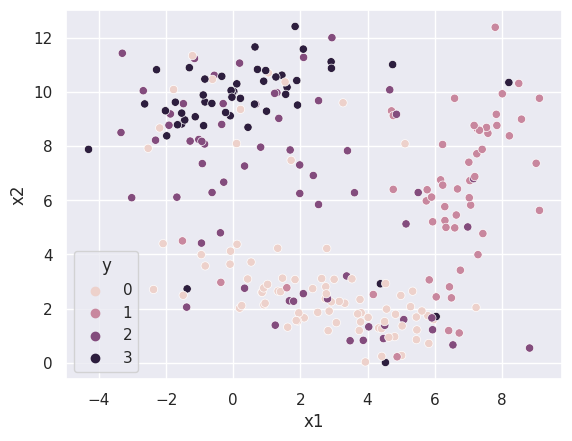

In [ ]:
p = sns.scatterplot(x=train.x1, y=train.x2, hue = train.y)

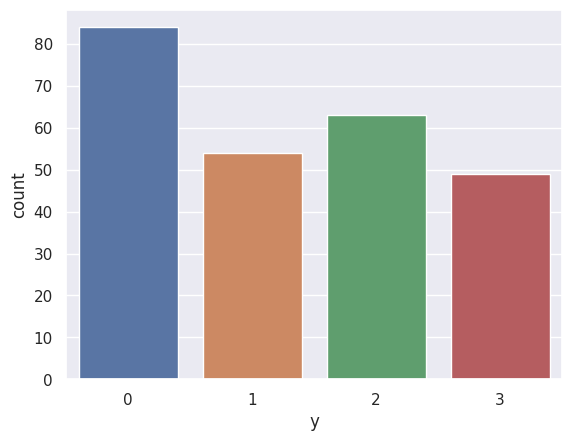

In [ ]:
p= sns.countplot(x=train.y)

In [ ]:
def getNeighbour(data, observasi, k):
    data['distance'] = 0.0
    for idx, dt in data.iterrows():
        data.at[idx, 'distance'] = distance.minkowski(dt[['x1','x2']], observasi[['x1','x2']], 2)
    data.sort_values(by=['distance'], inplace=True, ascending=True)
    data = data.head(k)
    return data

In [ ]:
# Serial Code
k = 5
cross_validasi = 10
hasil = {'waktu':[], 'label':[]}
akurasi = []
for cv in range(cross_validasi):
    mulai = time.time()
    prediksi = []
    for i, d in test.iterrows():
        tetangga = getNeighbour(train, d, k)
        prediksi.append(tetangga.y.mode().values[0])
    waktu = time.time() - mulai
    akurasi.append(accuracy_score(test.y.tolist(), prediksi))
    hasil['waktu'].append(waktu)
    hasil['label'].append('serial')

print("Rata-rata akurasi = {}, Variansi Akurasi = {}".format(np.mean(akurasi), np.var(akurasi)), flush=True)
# Catatan: karena "test data" tidak berubah di setiap iterasi, maka akurasi tidak perlu masuk ke variabel "hasil"
hasil = pd.DataFrame(hasil)
hasil.head()

Rata-rata akurasi = 0.716, Variansi Akurasi = 0.0


,waktu,label
0,50.630931,serial
1,48.459574,serial
2,48.894463,serial
3,48.606722,serial
4,49.483006,serial


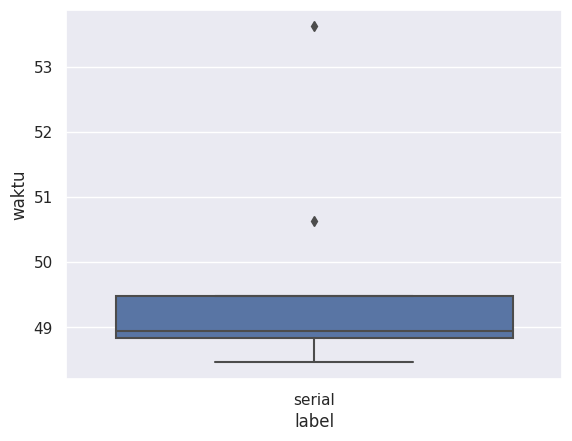

In [ ]:
p = sns.boxplot(y="waktu", x="label", data=hasil)

##**1. Bandingkan performa model dengan 3 rumus jarak lainnya: [Manhattan, Chebysev, dan Canberra]**

##Model Manhattan

In [ ]:
def getNeighbourManhattan(data, observasi, k):
    data['distance'] = 0.0
    for idx, dt in data.iterrows():
        data.at[idx, 'distance'] = distance.minkowski(dt[['x1','x2']], observasi[['x1','x2']], 1)
    data.sort_values(by=['distance'], inplace=True, ascending=True)
    data = data.head(k)
    return data
# Serial Code
k = 5
cross_validasi = 10
hasil = {'waktu':[], 'label':[]}
akurasi = []
for cv in range(cross_validasi):
    mulai = time.time()
    prediksi = []
    for i, d in test.iterrows():
        tetangga = getNeighbourManhattan(train, d, k)
        prediksi.append(tetangga.y.mode().values[0])
    waktu = time.time() - mulai
    akurasi.append(accuracy_score(test.y.tolist(), prediksi))
    hasil['waktu'].append(waktu)
    hasil['label'].append('serial')

print("Rata-rata akurasi Manhattan = {}, Variansi Akurasi Manhattan = {}".format(np.mean(akurasi), np.var(akurasi)), flush=True)
hasil = pd.DataFrame(hasil)
hasil.head()

Rata-rata akurasi Manhattan = 0.708, Variansi Akurasi Manhattan = 0.0


,waktu,label
0,49.241187,serial
1,49.864916,serial
2,49.168611,serial
3,50.162207,serial
4,49.496482,serial


In [ ]:
avgtime = hasil['waktu'].mean()
print("Rata-rata waktu running Manhattan = {} ".format(avgtime))

Rata-rata waktu running Manhattan = 49.536726570129396 


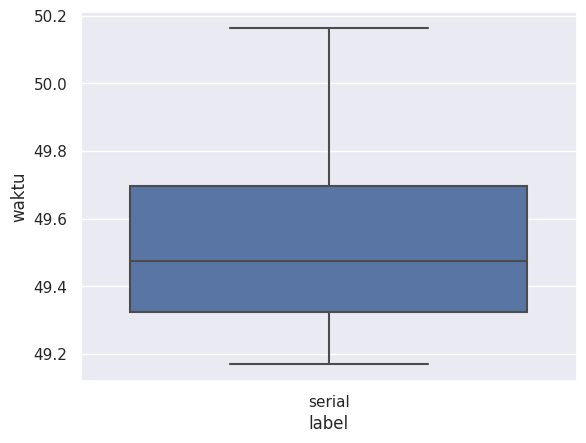

In [ ]:
p = sns.boxplot(y="waktu", x="label", data=hasil)

##Model Chebysev

In [ ]:
def getNeighbourChebyshev(data, observasi, k):
    data['distance'] = 0.0
    for idx, dt in data.iterrows():
        data.at[idx, 'distance'] = distance.chebyshev(dt[['x1','x2']], observasi[['x1','x2']])
    data.sort_values(by=['distance'], inplace=True, ascending=True)
    data = data.head(k)
    return data
# Serial Code
k = 5
cross_validasi = 10
hasil = {'waktu':[], 'label':[]}
akurasi = []
for cv in range(cross_validasi):
    mulai = time.time()
    prediksi = []
    for i, d in test.iterrows():
        tetangga = getNeighbourChebyshev(train, d, k)
        prediksi.append(tetangga.y.mode().values[0])
    waktu = time.time() - mulai
    akurasi.append(accuracy_score(test.y.tolist(), prediksi))
    hasil['waktu'].append(waktu)
    hasil['label'].append('serial')

print("Rata-rata akurasi Chebyshev = {}, Variansi Akurasi Chebyshev = {}".format(np.mean(akurasi), np.var(akurasi)), flush=True)
hasil = pd.DataFrame(hasil)
hasil.head()

Rata-rata akurasi Chebyshev = 0.736, Variansi Akurasi Chebyshev = 0.0


,waktu,label
0,48.643615,serial
1,48.601366,serial
2,47.981181,serial
3,48.978042,serial
4,49.819253,serial


In [ ]:
avgtime = hasil['waktu'].mean()
print("Rata-rata waktu running Chebyshev = {} ".format(avgtime))

Rata-rata waktu running Chebyshev = 48.665044856071475 


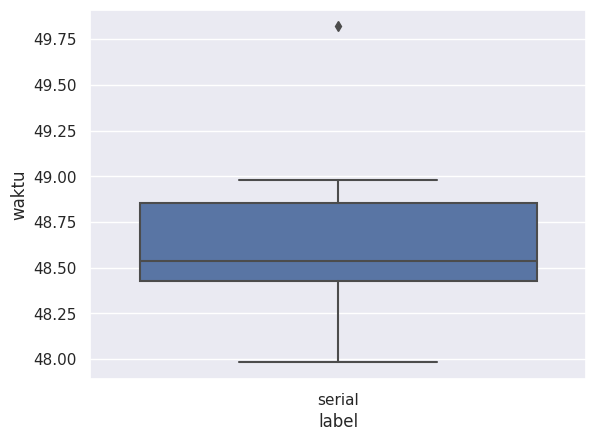

In [ ]:
p = sns.boxplot(y="waktu", x="label", data=hasil)

##Model Canberra

In [ ]:
def calculate_canberra_distance(row, observation):
    return distance.canberra(row[['x1', 'x2']], observation[['x1', 'x2']])

def get_neighbour_canberra(data, observation, k):
    data['distance'] = data.apply(lambda row: calculate_canberra_distance(row, observation), axis=1)
    data.sort_values(by=['distance'], inplace=True, ascending=True)
    return data.head(k)

# Serial Code
k = 5
cross_validation = 10
results = {'time': [], 'label': []}
accuracies = []

for cv in range(cross_validation):
    start_time = time.time()
    predictions = []

    for index, test_row in test.iterrows():
        neighbors = get_neighbour_canberra(train, test_row, k)
        predictions.append(neighbors['y'].mode().values[0])

    elapsed_time = time.time() - start_time
    accuracies.append(accuracy_score(test['y'].tolist(), predictions))
    results['time'].append(elapsed_time)
    results['label'].append('serial')

average_accuracy = np.mean(accuracies)
variance_accuracy = np.var(accuracies)

print("Average Canberra Accuracy = {}, Variance of Canberra Accuracy = {}".format(average_accuracy, variance_accuracy), flush=True)
results_df = pd.DataFrame(results)
results_df.head()

Average Canberra Accuracy = 0.712, Variance of Canberra Accuracy = 0.0


,time,label
0,47.778657,serial
1,47.213930,serial
2,46.629235,serial
3,47.396094,serial
4,47.433537,serial


In [ ]:
avgtime = hasil['waktu'].mean()
print("Rata-rata waktu running Canberra = {} ".format(avgtime))

Rata-rata waktu running Canberra = 48.665044856071475 


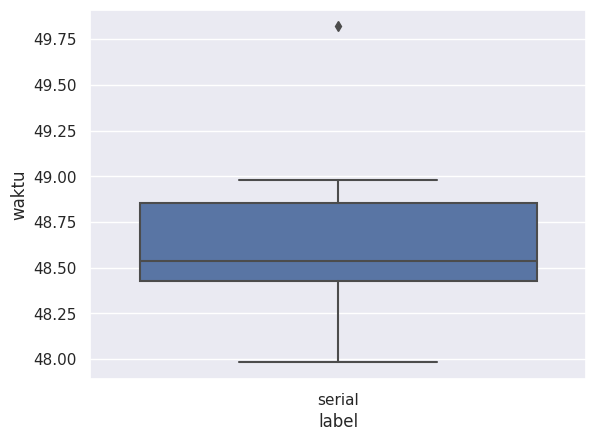

In [ ]:
p = sns.boxplot(y="waktu", x="label", data=hasil)

Berdasarkan hasil di atas, didapatkan bentuk dan performa dari 3 model dengan 3 metode berbeda, yaitu Manhattan, Chebyshev, dan Canberra. Didapatkan bahwa

- Manhattan = Rata-rata akurasi 0.708, Variasi Akurasi Manhattan = 0.0, rata-rata waktu running time = 49,536726570129396
- Chebyshev = Rata-rata akurasi 0.736, Variasi Akurasi Manhattan = 0.0, rata-rata waktu running time = 48,665044856071475
- Canberra = Rata-rata akurasi 0.712, Variasi Akurasi Canberra = 0.0, rata-rata waktu running time = 48,665044856071475

Pada masing-masing model dengan rumus jarak terlihat bahwa data dengan model rumus jarak Chebyshev memiliki rata-rata dengan akurasi tertinggi, lalu diikuti dengan model rumus jarak Canberra dan terakhir dengan akurasi terendah adalah model dengan rumus jarak Manhattan.

Untuk model yang membutuhkan rata-rata waktu running yang cenderung lebih lama dibandingkan dengan model yang lainnya adalah model Manhattan, lalu diikuti dengan kedua model lainnya yang memiliki rata-rata running waktu yang sama yaitu Chebyshev dan Canberra.

Pada ketiga model di atas, model terbaik yang didapat adalah model Chebyshev, karena memiliki akurasi tertinggi dan juga rata-rata waktu running yang cenderung cepat.

##**2. Menggunakan Thread Programming dan-atau Pemrograman Parallel (10-fold CV seperti contoh serial) tingkatkan efisiensi waktu code dibawah. Gunakan 1 cell terpisah agar bisa di cek via "terminal" sebagaimana yang kita lakukan di kuliah.**

In [ ]:
#import threading
#import multiprocessing
#import warnings; warnings.simplefilter('ignore')
#import pandas as pd, matplotlib.pyplot as plt, seaborn as sns, numpy as np
#import matplotlib.cm as cm, time
#from scipy.spatial import distance
#from sklearn.metrics import accuracy_score

# Serial Code
#k = 5
#cross_validasi = 10

#def getNeighbourManhattan(data1, observasi, k):
    #data = data1.copy()
    #data['distance'] = 0.0
    #for idx, dt in data.iterrows():
        #data.at[idx, 'distance'] = distance.minkowski(dt[['x1','x2']], observasi[['x1','x2']], 1)
    #data.sort_values(by=['distance'], inplace=True, ascending=True)
    #data = data.head(k)
    #return data

#def getNeighbourChebyshev(data1, observasi, k):
    #data = data1.copy()
    #data['distance'] = 0.0
    #for idx, dt in data.iterrows():
        #data.at[idx, 'distance'] = distance.chebyshev(dt[['x1','x2']], observasi[['x1','x2']])
    #data.sort_values(by=['distance'], inplace=True, ascending=True)
    #data = data.head(k)
    #return data

#def getNeighbourCanberra(data1, observasi, k):
    #data = data1.copy()
    #data['distance'] = 0.0
    #for idx, dt in data.iterrows():
        #data.at[idx, 'distance'] = distance.canberra(dt[['x1','x2']], observasi[['x1','x2']])
    #data.sort_values(by=['distance'], inplace=True, ascending=True)
    #data = data.head(k)
    #return data

#def cross_validation(train, test, func, nama, num=cross_validasi, k=k):
    #hasil = {'waktu':[], 'label':[]}
    #akurasi = []
    #for cv in range(num):
        #mulai = time.time()
        #prediksi = []
        #for i, d in test.iterrows():
            #tetangga = func(train, d, k)
            #prediksi.append(tetangga.y.mode().values[0])
        #waktu = time.time() - mulai
        #akurasi.append(accuracy_score(test.y.tolist(), prediksi))
        #hasil['waktu'].append(waktu)
        #hasil['label'].append('parallel')

    #print(pd.DataFrame(hasil).head())
    #print("{}: Rata-rata akurasi = {}, Variansi Akurasi = {}".format(nama, np.mean(akurasi), np.var(akurasi)), flush=True)

# Catatan: karena "test data" tidak berubah di setiap iterasi, maka akurasi tidak perlu masuk ke variabel "hasil"

#if _name_ == "_main_":
    # creating thread
    #t1 = multiprocessing.Process(target=cross_validation, args=(train, test, getNeighbourManhattan, "Manhattan"))
    #t2 = multiprocessing.Process(target=cross_validation, args=(train, test, getNeighbourChebyshev, "Chebyshev"))
    #t3 = multiprocessing.Process(target=cross_validation, args=(train, test, getNeighbourCanberra, "Canberra"))
    #t1.start()  # starting thread 1
    #t2.start()  # starting thread 2
    #t3.start()

    #t1.join()  # wait until thread 1 is completely executed
    #t2.join() # wait until thread 2 is completely executed
    #t3.join()
    # both threads completely executed
    #print("Done!")

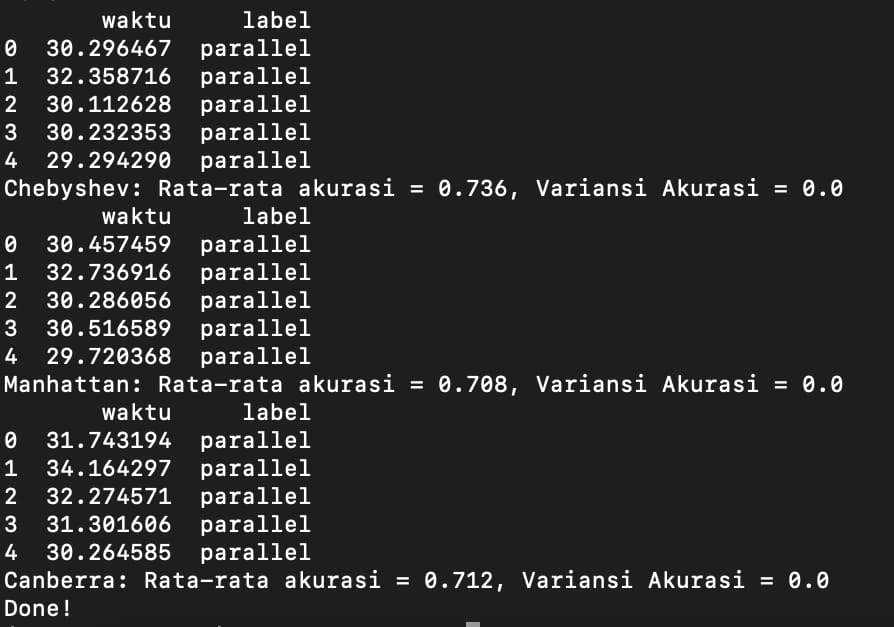

#Kesimpulan :

Berdasarkan hasil yang sudah kami dapat seperti pada gambar di atas, dengan melakukan metode multi processing perhitungan model clustering dapat dilakukan dengan running time yang lebih rendah sehingga kita bisa mendapatkan model yang lebih efisien.